In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("datasets/train_dataset.csv", index_col=0)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [3]:
df.nunique() 

Gender                                  2
Customer Type                           2
Age                                    74
Type of Travel                          2
Class                                   3
Flight Distance                      2421
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        5
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        5
Cleanliness                             6
Departure Delay in Minutes            239
Arrival Delay in Minutes              242
satisfaction                            2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [5]:
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [6]:
df['Class'].value_counts ()

Class
Business    5048
Eco         4251
Eco Plus     701
Name: count, dtype: int64

In [7]:
df['Customer Type'].value_counts ()

Customer Type
Loyal Customer       8307
disloyal Customer    1693
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts ()

Gender
Female    5169
Male      4831
Name: count, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,39.375100,14.897959,7.0,27.0,40.0,51.00,80.0
Flight Distance,10000.0,1229.556200,1022.281958,31.0,421.0,863.5,1806.75,4983.0
Inflight wifi service,10000.0,2.780200,1.362745,0.0,2.0,3.0,4.00,5.0
Departure/Arrival time convenient,10000.0,3.065100,1.527316,0.0,2.0,3.0,4.00,5.0
Ease of Online booking,10000.0,2.797800,1.421168,0.0,2.0,3.0,4.00,5.0
Gate location,10000.0,2.981000,1.283278,1.0,2.0,3.0,4.00,5.0
Food and drink,10000.0,3.214500,1.333217,0.0,2.0,3.0,4.00,5.0
Online boarding,10000.0,3.349100,1.352779,0.0,2.0,4.0,4.00,5.0
Seat comfort,10000.0,3.491400,1.311220,0.0,3.0,4.0,5.00,5.0
Inflight entertainment,10000.0,3.402900,1.331822,0.0,2.0,4.0,5.00,5.0


In [9]:
df.satisfaction.value_counts()

satisfaction
0    5000
1    5000
Name: count, dtype: int64

In [10]:
df.duplicated().sum()

486

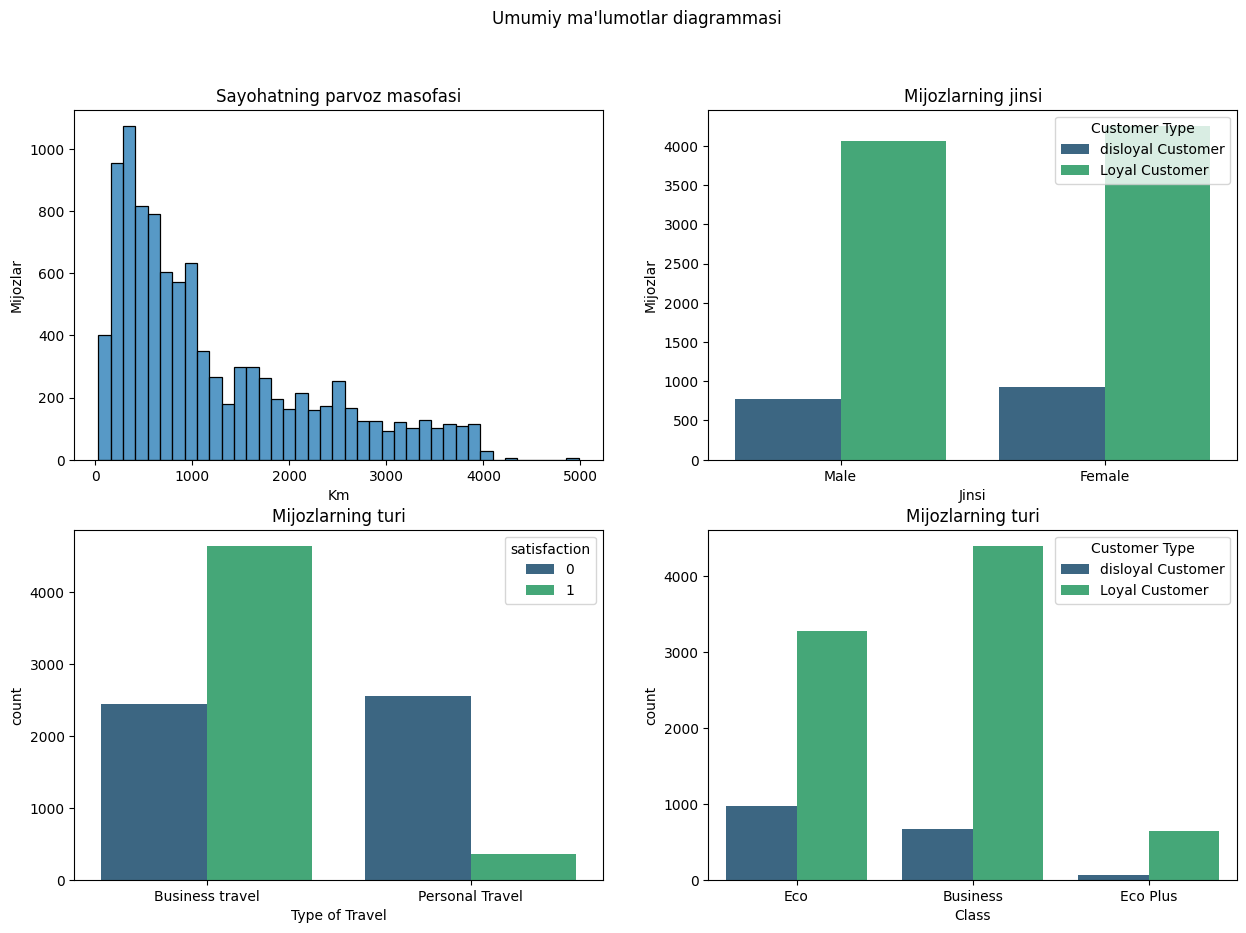

<Figure size 1600x600 with 0 Axes>

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
# Umumiy chizma nomini beramiz:
fig.suptitle("Umumiy ma'lumotlar diagrammasi")

plt.figure(figsize=(16, 6))
sns.histplot(x="Flight Distance", data=df, ax=ax[0,0])
ax[0,0].set_title("Sayohatning parvoz masofasi")
ax[0, 0].set_ylabel("Mijozlar")
ax[0, 0].set_xlabel("Km")

sns.countplot(x='Gender', hue='Customer Type', palette='viridis', data=df, ax=ax[0,1])
ax[0,1].set_title("Mijozlarning jinsi")
ax[0, 1].set_ylabel("Mijozlar")
ax[0, 1].set_xlabel("Jinsi")

sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=df, ax=ax[1,0])
ax[1,0].set_title("Mijozlarning turi")

sns.countplot(x='Class', hue='Customer Type', palette='viridis', data=df, ax=ax[1,1])
ax[1,1].set_title("Mijozlarning turi")

plt.show()

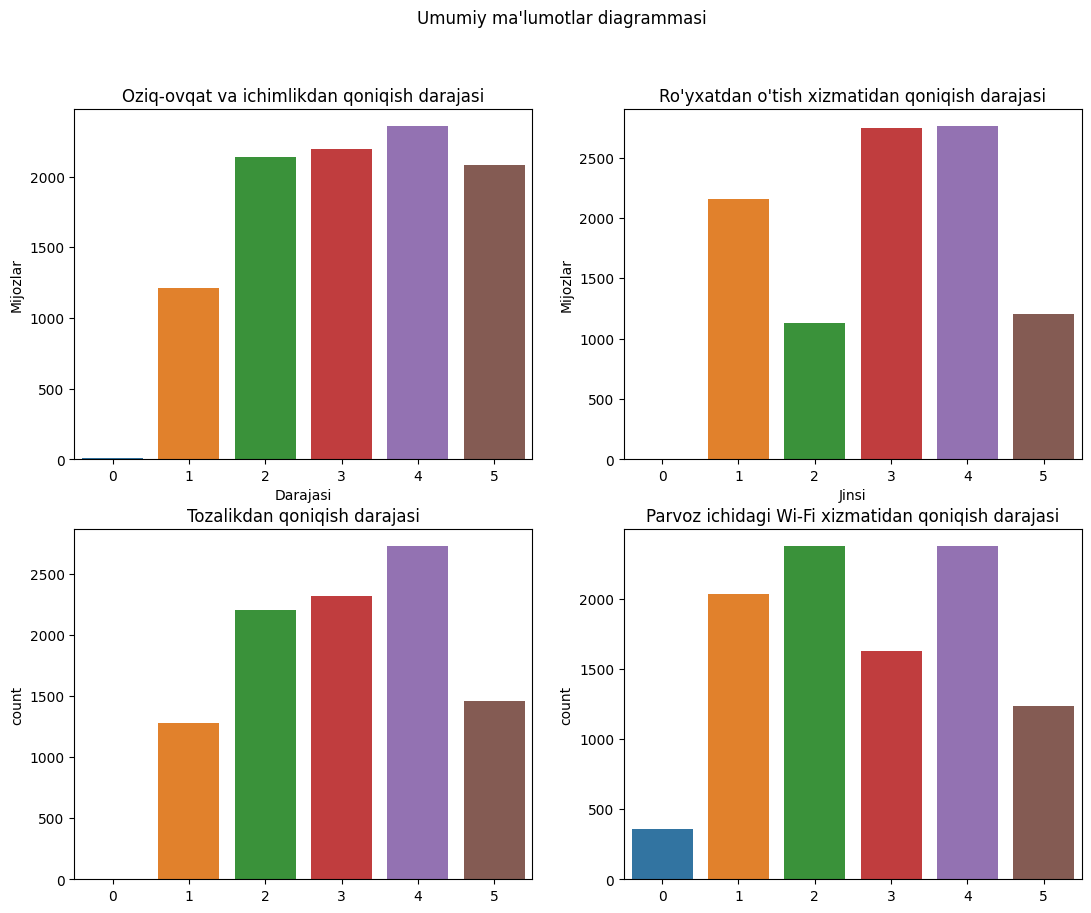

<Figure size 1200x600 with 0 Axes>

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(13, 10))
# Umumiy chizma nomini beramiz:
fig.suptitle("Umumiy ma'lumotlar diagrammasi")

plt.figure(figsize=(12, 6))
sns.barplot(ax=ax[0, 0], x=df['Food and drink'].unique(), y=df['Food and drink'].value_counts())
ax[0,0].set_title("Oziq-ovqat va ichimlikdan qoniqish darajasi")
ax[0, 0].set_ylabel("Mijozlar")
ax[0, 0].set_xlabel("Darajasi")

sns.barplot(ax=ax[0, 1], x=df['Checkin service'].unique(), y=df['Checkin service'].value_counts())
ax[0,1].set_title("Ro'yxatdan o'tish xizmatidan qoniqish darajasi")
ax[0, 1].set_ylabel("Mijozlar")
ax[0, 1].set_xlabel("Jinsi")

sns.barplot(ax=ax[1, 0], x=df['Cleanliness'].unique(), y=df['Cleanliness'].value_counts())
ax[1,0].set_title("Tozalikdan qoniqish darajasi")

sns.barplot(ax=ax[1, 1], x=df['Inflight wifi service'].unique(), y=df['Inflight wifi service'].value_counts())
ax[1,1].set_title("Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi")

plt.show()

In [13]:
def drop_nan_duplicated(df):
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    return df

In [14]:
drop_nan_duplicated(df)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,2,...,4,4,1,4,4,4,3,21,12.0,0
9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,3,...,4,4,4,4,3,4,3,37,38.0,1


In [15]:
train_x = df.drop("satisfaction", axis=1)
train_y = df.satisfaction
train_y

id
1        0
2        1
3        0
4        1
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    1
Name: satisfaction, Length: 9486, dtype: int64

In [16]:
X_dummy = pd.get_dummies(train_x)

In [17]:
X_dummy.shape

(9486, 27)

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X_dummy, train_y, test_size=0.2, stratify=train_y, random_state=42)

In [19]:
LR_model = LogisticRegression()
SVC_model = SVC()
Tree_model = DecisionTreeClassifier()
XGB_model = XGBClassifier()

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train_prepared = scaler.fit_transform(X_train)
X_test_prepared = scaler.transform(X_test)

In [22]:
test_x = pd.read_csv('datasets/test_dataset.csv',index_col=0)

In [23]:
test_x[["Arrival Delay in Minutes"]]=test_x[["Arrival Delay in Minutes"]].fillna(test_x["Arrival Delay in Minutes"].mean())

In [24]:
test_x

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,Male,Loyal Customer,26,Business travel,Business,2949,3,3,4,3,...,4,4,1,4,2,3,1,4,29,36.0
3997,Female,Loyal Customer,23,Personal Travel,Eco,268,1,3,0,3,...,2,2,3,2,4,2,3,2,0,0.0
3998,Male,Loyal Customer,38,Business travel,Eco,602,2,1,1,1,...,2,2,1,1,2,2,3,2,23,45.0


In [25]:
train_y

id
1        0
2        1
3        0
4        1
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    1
Name: satisfaction, Length: 9486, dtype: int64

In [27]:
test_x=pd.get_dummies(test_x)

### Logistic regression


In [28]:
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       955
           1       0.79      0.89      0.83       943

    accuracy                           0.82      1898
   macro avg       0.83      0.82      0.82      1898
weighted avg       0.83      0.82      0.82      1898

Model aniqligi: 0.8234984193888304


c:\Users\victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### RandomForestClassifier

In [29]:
RF_model = RandomForestClassifier()
# Modelni yaratamiz (training)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       955
           1       0.95      0.95      0.95       943

    accuracy                           0.95      1898
   macro avg       0.95      0.95      0.95      1898
weighted avg       0.95      0.95      0.95      1898

Model aniqligi: 0.9515279241306639


## Support Vector Machine

In [30]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.81      0.70       955
           1       0.71      0.47      0.57       943

    accuracy                           0.64      1898
   macro avg       0.66      0.64      0.63      1898
weighted avg       0.66      0.64      0.63      1898

Model aniqligi: 0.6422550052687039


### XGB model

In [31]:
# Modelni yaratamiz (training)
XGB_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = XGB_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       955
           1       0.96      0.94      0.95       943

    accuracy                           0.95      1898
   macro avg       0.95      0.95      0.95      1898
weighted avg       0.95      0.95      0.95      1898

Model aniqligi: 0.9504741833508957


In [32]:
data=pd.read_csv("datasets/test_dataset.csv",index_col=0)

In [33]:
data=data.fillna(method="bfill")  
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 1 to 4000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   object 
 1   Customer Type                      4000 non-null   object 
 2   Age                                4000 non-null   int64  
 3   Type of Travel                     4000 non-null   object 
 4   Class                              4000 non-null   object 
 5   Flight Distance                    4000 non-null   int64  
 6   Inflight wifi service              4000 non-null   int64  
 7   Departure/Arrival time convenient  4000 non-null   int64  
 8   Ease of Online booking             4000 non-null   int64  
 9   Gate location                      4000 non-null   int64  
 10  Food and drink                     4000 non-null   int64  
 11  Online boarding                    4000 non-null   int64  
 1

In [50]:
data=pd.get_dummies(data)

In [51]:
data=scaler.fit_transform(data)
data

array([[0.24657534, 0.53641172, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.57534247, 0.31651749, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.60273973, 0.05512612, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.42465753, 0.10882832, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.21917808, 0.18531326, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.24657534, 0.20728234, 0.6       , ..., 0.        , 1.        ,
        0.        ]])

In [57]:
natija=XGB_model.predict(test_x)

In [53]:
natija_fayl=pd.read_csv("datasets/sample_submission.csv", index_col=0)

In [54]:
natija_fayl['satisfaction']=natija

In [55]:
natija_fayl.to_csv('javob.csv')

In [56]:
natija_fayl

,satisfaction
id,
1,0
2,1
3,1
4,1
5,0
...,...
3996,1
3997,0
3998,0
